In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from numpy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Reading data 

In [259]:
data = pd.read_csv('Country-data.csv')
columns = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
features = data[columns]

### Normalizing the data

In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

CT = ColumnTransformer([('', StandardScaler(), ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp'])], remainder='passthrough')

normalized_data = CT.fit_transform(features)
normalized_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Applying PCA

In [261]:
cov_mat = np.cov(normalized_data, rowvar=False)
eigenvalues, eigenvectors = eigh(cov_mat)
total_eigenvalues = sum(eigenvalues)
var_exp = [(i/total_eigenvalues) for i in sorted(eigenvalues, reverse=True)]
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component num')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

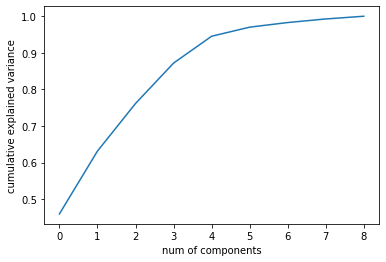

In [263]:
pca = PCA(n_components=None).fit(normalized_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance');

### Applying pca with proper number of components that is robust to overfitting i.e 2 components

In [264]:
pca = PCA(n_components=3)
pca.fit(normalized_data)
pca_res = pca.transform(normalized_data)
print(normalized_data.shape ,pca_res.shape)

(167, 9) (167, 3)


### Applying Kmeans on PCA results 

In [265]:
distortions=[]
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', n_init=9,max_iter=200,random_state=0)
    kmeans_pca.fit(pca_res)
    distortions.append(kmeans_pca.inertia_)

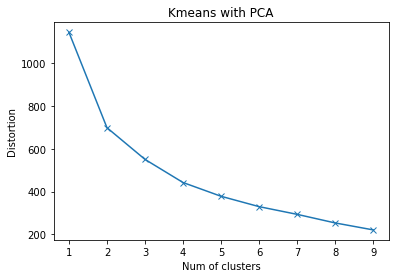

In [266]:
plt.plot(range(1,10), distortions, marker='x')
plt.title('Kmeans with PCA')
plt.xlabel('Num of clusters')
plt.ylabel('Distortion')
plt.show()

In [267]:
km = KMeans(n_clusters=2, random_state=40)
pred=km.fit_predict(pca_res)
print(pred)

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0]


In [268]:
print(type(pca_res))

<class 'numpy.ndarray'>


In [271]:
df=pd.DataFrame(pca_res, columns = ['0','1','2'])

### Drawing scattrer plot

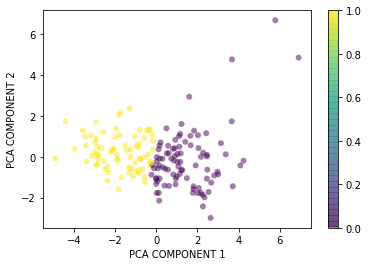

In [256]:
plt.scatter(df['0'], df['1'], c=pred, edgecolor='none', alpha=0.5,)
plt.xlabel('PCA COMPONENT 1')
plt.ylabel('PCA COMPONENT 2')
plt.colorbar()

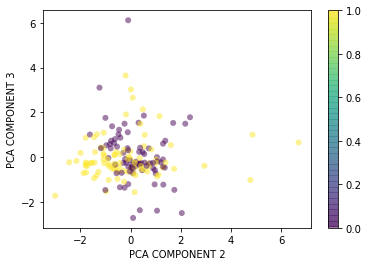

In [272]:
plt.scatter(df['1'], df['2'], c=pred, edgecolor='none', alpha=0.5,)
plt.xlabel('PCA COMPONENT 2')
plt.ylabel('PCA COMPONENT 3')
plt.colorbar()

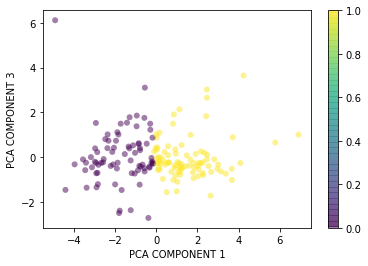

In [273]:
plt.scatter(df['0'], df['2'], c=pred, edgecolor='none', alpha=0.5,)
plt.xlabel('PCA COMPONENT 1')
plt.ylabel('PCA COMPONENT 3')
plt.colorbar()